# Errors in numerical computations

Let us look at one interesting example. The Taylor series for a function  $\cos x$ is given as
$$\cos x=\sum_{n=0}^\infty (-1)^n\frac{x^{2n}}{(2n)!}$$
Let us approximate function $\cos x$ by Taylor polynomial of a different order. This is given in the following code

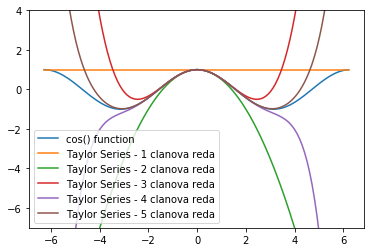

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)

for i in range(1,6):
    t_cos = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} clanova reda')
ax.legend(legend_lst, loc=3)

plt.show()

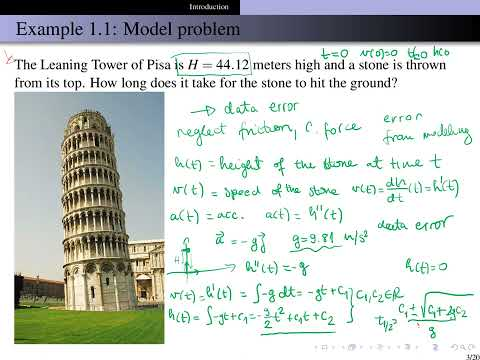

In [10]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("pJBYlyOk2TQ")
display(vid)

Let us recall that the Taylor series for a function $\sin x$ is given by
$$\sin x=\sum_{n=0}^\infty (-1)^n\frac{x^{2n+1}}{(2n+1)!}$$

In [3]:
import math

def AprSin(x):
    sin_approx = 0
    t=x
    a=abs(t)
    n=1
    while sin_approx+t!= sin_approx:
        sin_approx=sin_approx+t
        t=-(x**2)/((n+1)*(n+2))*t
        a=max(a,abs(t))
        n=n+2
        
    print("n=", n)
    print("t=",t)
    print("Maksimalni član="f"{a:.2e}")
    return sin_approx

In [4]:
print("sin(pi/2)=",AprSin(math.pi/2))
print("sin(11pi/2)=",AprSin(11*math.pi/2))
print("sin(21pi/2)=", AprSin(21*math.pi/2))
print("sin(31pi/2)=",AprSin(31*math.pi/2))

n= 23
t= -1.253899540535457e-18
Maksimalni član=1.57e+00
sin(pi/2)= 1.0000000000000002
n= 75
t= -2.623194179687491e-17
Maksimalni član=3.07e+06
sin(11pi/2)= -1.0000000002128728
n= 121
t= 6.46934878239496e-18
Maksimalni član=1.47e+13
sin(21pi/2)= 0.9998667640418495
n= 157
t= 7.333724294246771e-14
Maksimalni član=7.99e+19
sin(31pi/2)= -5822.01852702401


# In computer are not always stored "correct" values!

In [6]:
a=4./3
print("a=",a)
b=a-1.0
print("b=",b)
c=3*b
print("c=",c)
d=1.0-c
print("d=", d)

a= 1.3333333333333333
b= 0.33333333333333326
c= 0.9999999999999998
d= 2.220446049250313e-16


In [7]:
0.7/0.1

6.999999999999999

# Representation of real numbers in computer

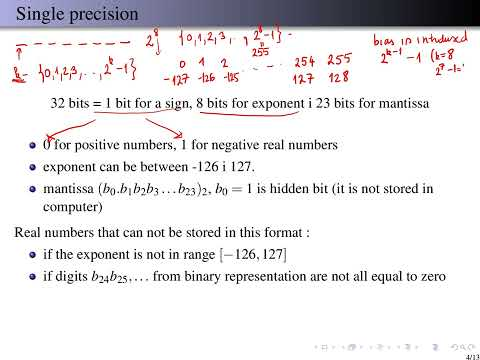

In [11]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("7tLZpNbBhMQ")
display(vid)




**TASK. Find the value of the largest IEEE  fp-number of double presicision!**

Solution. 

We know that 
$$x=\pm (1+f)\times 2^e$$ where

$$-1022\leq e\leq 1023,\quad f=sum_{i=1}^{52}\beta_i\cdot 2^{-i},\ \beta_i\in\{0,1\}$$

First fp-number that is lower of +INF is (exponent has 11 bits, mantissa 52 bits)

$$0 \quad 11111111110 \quad 1111111111111111111111111111\ldots 1$$

Exponent is $e=1023$ 
Mantissa is
$$1+f_{max}=1\cdot 2^{-1}+1\cdot 2^{-2}+1\cdot 2^{-3}+\ldots 1\cdot 2^{-52}$$
$$f_{max}=\frac{1}{2}\left(1+\frac{1}{2}+\ldots +\frac{1}{2^{51}}\right)=\frac{1}{2}\frac{1-\left(\frac{1}{2}\right)^{52}}{1-\frac{1}{2}}=1-2^{-52}$$
So, the largest fp-number in double presicion is

$$(1+f_{max})\times 2^{1023}=(1+1-2^{-52})\times 2^{1023}=2^{1024}-2^{971}\approx 1.797693\cdot 10^{308}$$

** TASK. Find the value of first fp-number of double presicion that comes after number 50**

**Solution.**

The biggest number $k$ for which is $2^k<50$ is  $k=5.$

$$50=(1+f)\times 2^5, f\in [0,1\rangle$$

$$\begin{array}{ccc} 50:2&=25\quad & 0\\
25:2&=12\quad & 1\\
12:2&=6\quad & 0\\
6:2&=3\quad & 0\\
3:2&=1\quad & 1\\
1:2&=0\quad & 1\end{array}$$
Therefore the representation fo  $50$ in base 2 is:
$$(110010)_2=(1.1001)_2\times 2^{5}$$

Mantissa has 52 places and is of the form
$$100100\ldots 00$$

First bigger fp-number than $50$ has mantissa
$$100100\ldots 01$$

Now we obtain:
$$(1+f+2^{-52})\times 2^{5}=(1+f)\times 2^{5}+2^{-52+5}=50+2^{-47}$$


**TASK. How many are there fp-numbers of double precision**

**Solution.**

We have
sign+exponent+mantissa=1+11+52=64 bits


This is $2^{64}$ number from which we substract:

1. all "0" in the esponent, $\pm$: $2^{52}\cdot 2$
2. all "1" in the exponent $\pm$: $2^{52}\cdot 2$

The result is
$$2^{64}-2\cdot 2^{53}=2^{64}-2^{54}$$

Maximal and minimal number in a double precision we can also ger as:

In [1]:
import sys
print("x_max=",sys.float_info.max)
print("x_min=", sys.float_info.min)
print("eps=", sys.float_info.epsilon)

x_max= 1.7976931348623157e+308
x_min= 2.2250738585072014e-308
eps= 2.220446049250313e-16


We can also use Numpy for getting info about fp-system

In [2]:
import numpy as np
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



LEt us now see how we can get the values inf i nan

In [3]:

a=0.2e2000
print("a=",a)
b=float('inf')-float('inf')
print("b=", b)

a= inf
b= nan


Dividng by zoreo give us the warning message. In Matlab we would get Inf

In [4]:
c=1.0/0.0
print("c=", c)

ZeroDivisionError: float division by zero

The following operation signalize overflow. In Matlab we would for $2^{2000}$ get the value INF

In [5]:
d=2.0**2000
print("d=", d)

OverflowError: (34, 'Result too large')

MATLAB was created as an interface to the Basic Libraries for Linear Algebra (BLAS). MATLAB-like behavior can be configured by changing the errstate setting in the numpy library.

In [6]:
import numpy as np
from collections import OrderedDict
olderr = np.seterr(all='ignore') 
e=np.exp(1000)
print("e=", e)
f=np.log(0)
print("f=", f)
np.arange(3) / 0.

e= inf
f= -inf


array([nan, inf, inf])

# Precision, machine epsilon and computer arithmetic

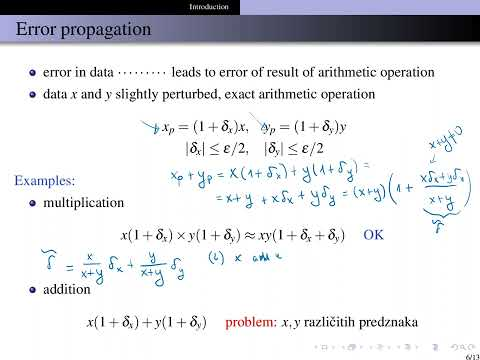

In [12]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("m0QbiWXfiq0")
display(vid)

In [7]:
print("eps=", sys.float_info.epsilon)

eps= 2.220446049250313e-16


In [8]:
def m_eps(func=float):
    eps = func(1)
    while func(1)+func(eps) != func(1):
        eps1 = eps
        eps = func(eps) / func(2)
    return eps1

In [9]:
m_eps(float)

2.220446049250313e-16

In [10]:
x=1.0
y=2.0**(-55)
z=1.0
print("x=",x)
print("y=", y)
print("z=", z)
print("(x+y)-z=",(x+y)-z)

x= 1.0
y= 2.7755575615628914e-17
z= 1.0
(x+y)-z= 0.0


# Solution to quadratic equation

In [11]:
import numpy as np
a=1.0
c=1.0
b=-(1.e+8+1.e-8)
coeff= [a, b, c]
print("Roots=",np.roots(coeff))

Roots= [1.e+08 1.e-08]


In [12]:
x1=(-b+np.sqrt(b**2-4*a*c))/(2*a)
print("x1=",x1)
x2=(-b-np.sqrt(b**2-4*a*c))/(2*a)
print("x2=",x2)

x1= 100000000.0
x2= 1.4901161193847656e-08


In [13]:
x2=c/(a*x1)
print("x2=",x2)

x2= 1e-08


# Calculation of $\frac{\ln(1+x)}{x}$

Znamo $\frac{\ln(1+x)}{x}\approx 1$ za $x\approx 0$

In [14]:
np.log(1+3.e-16)/(3.0e-16)

0.7401486830834376

In [15]:
np.log(1+3e-16)/((1+3.e-16)-1)

0.9999999999999999

# Linear system

In [1]:
import numpy as np
A = np.array([[17, 9], [1.7, 0.9]])
b = np.array([26,2.6])
x = np.linalg.solve(A,b)
print("x=",x)


x= [-0.58823529  4.        ]


In [14]:
mu=1.7/17
A[1,1]=A[1,1]-mu*A[0,1]
b[1]=b[1]-mu*b[0]
print("A[1,1]=", A[1,1])
print("b[1]=", b[1])


A[1,1]= 1.1102230246251565e-16
b[1]= 4.440892098500626e-16


In [15]:
x[1]=b[1]/A[1,1]
x[0]=(26-9*x[1])/17
print("x[0]=", x[0])
print("x[1]=", x[1])

x[0]= -0.5882352941176471
x[1]= 4.0


eps= 2.220446049250313e-16
